# Plotting with matplotlib (2)

[Matplotlib](https://matplotlib.org/) is a powerful and very popular data visualization library in Python.

# Basic visualization tools: bar charts, area plots, histograms

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Bar Charts

* A bar chart is a way of visualizing the data by which the *length* of the bars represents the size of the plotted variables. 
* Bar plots usually represent numerical and categorical variables grouped in intervals.
* Bar charts are useful for comparing numerical values across categories.
* Can be vertical (`plt.bar`) or horizontal (`plt.barh`)

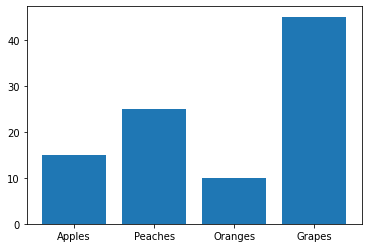

In [2]:
x = np.array(["Apples", "Peaches", "Oranges", "Grapes"])
y = np.array([15, 25, 10, 45])

plt.bar(x,y)
plt.show()

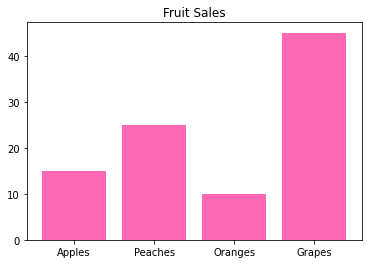

In [3]:
# Bar colors
plt.bar(x, y, color='hotpink')

plt.title("Fruit Sales")
plt.show()

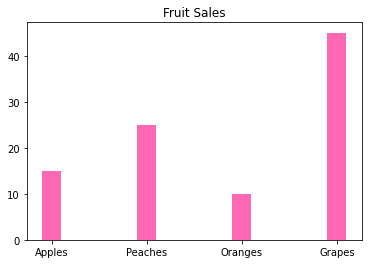

In [4]:
# Bar width
# The default width value is 0.8
plt.bar(x, y, color='hotpink', width = 0.2)

plt.title("Fruit Sales")
plt.show()

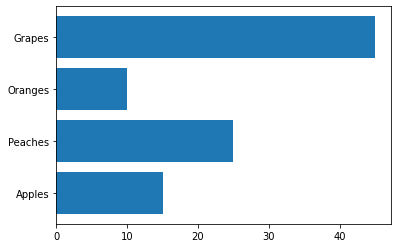

In [5]:
# Horizontal bars
plt.barh(x,y)
plt.show()

***

<BarContainer object of 7 artists>

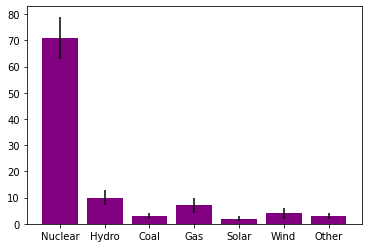

In [6]:
# Data about where France gets its electricity from
x = ['Nuclear', 'Hydro', 'Coal', 'Gas', 'Solar', 'Wind', 'Other']
perc = [71, 10, 3, 7, 2, 4, 3]
variance = [8, 3, 1, 3, 1, 2, 1]

# yerr, change error color with ecolor

plt.bar(x, perc, color='purple', yerr=variance)

<BarContainer object of 7 artists>

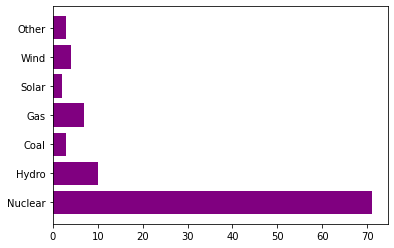

In [7]:
plt.barh(x, perc, color='purple')

***

**Side by side Bars**

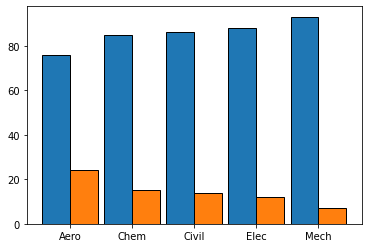

In [8]:
# Show percentages of males & females in engineering
m_eng = [76, 85, 86, 88, 93]
f_eng = [100-x for x in m_eng] #(24, 15, 14, 12, 7)

x = np.arange(5)

plt.bar(x, m_eng, width=0.45, label='Male', edgecolor='k')
plt.bar(x + 0.45, f_eng, width=0.45, label='Female', edgecolor='k')
plt.xticks(x + 0.45 / 2, ('Aero', 'Chem', 'Civil', 'Elec', 'Mech'))
plt.show()

**Stacked Bar Chart**

[0, 1, 2, 3]


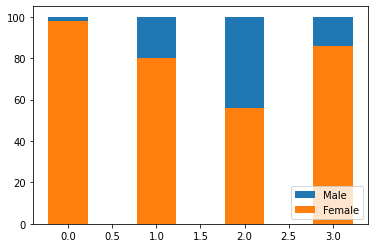

In [9]:
# Plot teachers by sex
m_teach = np.array([2, 20, 44, 14])
f_teach = 100 - m_teach #np.array([98, 80, 56, 86])
ind = [x for x, _ in enumerate(m_teach)]
print(ind)

# Plot stacked bars for men and then women under
plt.bar(ind, m_teach, width=0.45, label='Male', bottom=f_teach)
plt.bar(ind, f_teach, width=0.45, label='Female')

plt.legend(loc='lower right')
plt.show()

**<p style="color:red">EXERCISE 1</p>**

**Create several bar charts to plot the icescream sales from the Sales dataset.**
* In the first bar chart, the x axis should represent the temperature values from lowest to highest. The color of the bars should be orange. The bar chart should have x label ("Temperature") and y label ("Sales").
* In the second plot, you should have 2 subplots: the first one is a bar chart of the sales data and the second one is a line chart of the same data. The plot whould have the title "Bar and Line Plot of Sales".

In [10]:
# Your solution here...



## Bar Charts and DataFrames

The `plot()` function of a DataFrame can be used to create bar charts.

One of the following two arguments can be passed via the `kind` parameter in `plot()` to create a bar chart:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot

**Examples for the Canada Immigration Dataset**

The bar charts examples below are using the Canada Immigration dataset available <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01">here</a>.

This dataset contains annual data on the flows of international immigrants (from 45 countries) to Canada. 

## Dataset preparation


In [10]:
df = pd.read_excel("data/Canada.xlsx", 
                    sheet_name="Canada by Citizenship",
                    skiprows=range(20),
                    skipfooter=2)

In [11]:
df.shape

(195, 43)

In [12]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


The processing of the dataset is performed to:
1. Remove columns that are not necessary (not informative)
2. Rename some columns
3. Make all column labels strings
4. Set the index of the dataframe
5. Add an extra column

**1. Remove columns that are not necessary**

In [13]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


**2. Rename some columns**

In [14]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


**3. Column labels should be strings**

In [15]:
# are all the types of the column labels?
all(isinstance(column, str) for column in df.columns)

False

No, the years 1980....2013 are not strings.

In [16]:
df.columns = list(map(str, df.columns))

In [17]:
all(isinstance(column, str) for column in df.columns)

True

**4. Set the index to the country column**

In [18]:
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


**5. Add an extra column: Total**

In [19]:
# add an extra column with the total no of immiggrants per country
df['Total'] = df.sum(axis=1, numeric_only = True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [20]:
df.shape

(195, 38)

**Create a list of years from 1980 - 2013 as strings**

In [21]:
years = list(map(str, range(1980, 2014)))

In [22]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## Visualizing the dataset using Bar Charts

In [23]:
mpl.style.use('ggplot')  # optional: for ggplot-like style; default value 'default': plt.style.use('default')

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


**Compare the number of immigrants from Iceland over the years 1980-2013 using vertical bar plots**

In [24]:
# step 1: get the data
df_iceland = df.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

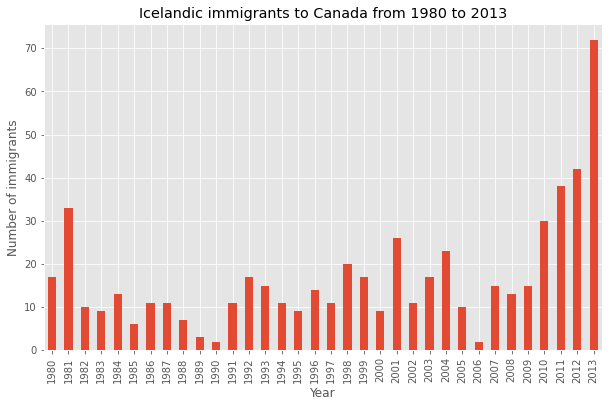

In [25]:
# step 2: plot data using a bar chart
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar chart shows in this case the impact of the financial crisis: the number of immigrants to Canada increasing rapidly after 2009.

**Annotations**

Use the `annotate` method of the **scripting layer** or the **pyplot interface**. 

Parameters:

*   `text`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

Matplotlib documentation for more details on annotations:
<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html>.

In [26]:
len(years)

34

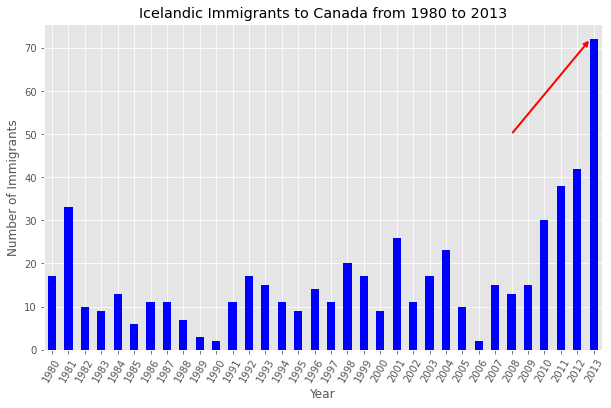

In [27]:
df_iceland.plot(kind='bar', figsize=(10, 6), color='blue', rot=60)  # rotate the xticks(labelled points on x-axis) by 60 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # text: str. blank for no text
             xy=(32.8, 72),  # place head of the arrow at point (year almost 2013 , pop 72)
             xytext=(28, 50),  # place base of the arrow at point (year 2008 , pop 50)
             xycoords='data',  # This is default value, will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
             )

plt.show()

Annotating a text to go over the arrow.  
Additional parameters:

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]

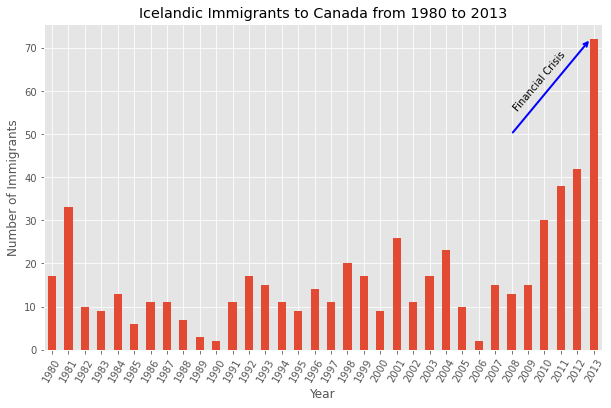

In [26]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=60)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  
             xy=(32.8, 72),  
             xytext=(28, 50),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('Financial Crisis',  # text to display
             xy=(28, 55),  # start the text at at point (year 2008 , pop 30)
             rotation=50,  # based on trial and error to match the arrow
             va='bottom',  # vertically 'bottom' aligned
             ha='left',  # horizontally 'left' aligned
             )

plt.show()

**Horizontal Bar Charts**

* The y-axis is used for labelling and the length of bars on the x-axis corresponds to the size of the variable.

Example: 
* Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. 
* Label each country with the total immigrant count.


In [27]:
# 1. Sort the data
df.sort_values(by='Total', ascending=False, inplace=True)

In [28]:
# 2. Get top 15 countries
df_top15 = df['Total'].head(15)

In [29]:
df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

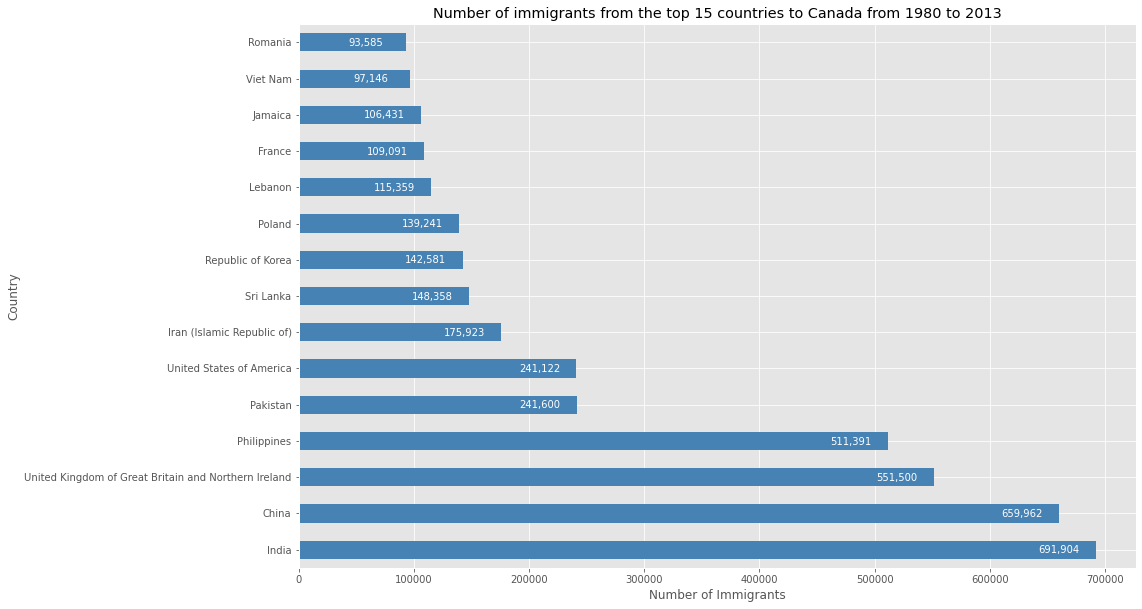

In [30]:
# 3. Plot the data
df_top15.plot(kind='barh', figsize=(15, 10), color='steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Number of immigrants from the top 15 countries to Canada from 1980 to 2013')

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    plt.annotate(label, xy=(value - 50000, index- 0.10), color='white')

plt.show()

**<p style="color:red">EXERCISE 2</p>**

**Create a vertical bar chart to plot the number of Romanian immigrants to Canada between 1980 and 2013.**
* Choose a color for the bars and specify it in hex RGB.
* Set titles for the chart as well as the x and y axis.
* Annotate the chart with an arrow and text indicating "Romanian Revolution".

**Create a horizontal bar chart to plot the number of Romanian immigrants to Canada between 2000 and 2013.**
* Choose a color 'blue' for the bars.
* Annotate each bar with the number of immigrants for that year.


Tip:
For a full listing of colors available in Matplotlib, run the following code in your python shell:

```python
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```

See Matplotlib documentation: https://matplotlib.org/stable/gallery/color/index.html 

In [32]:
# Your solution here...



***

## Area Plots

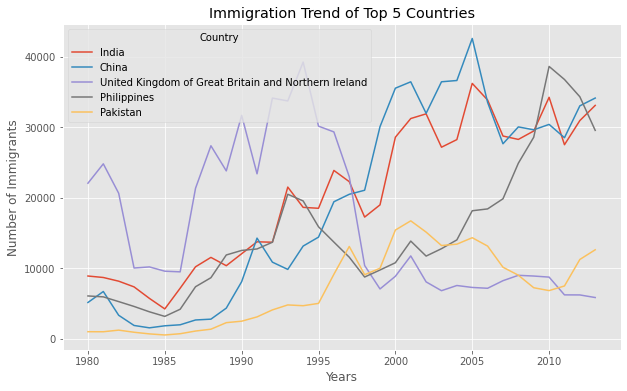

In [31]:
# Reminder from previous lecture:
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df5 = df.head(5)

# transpose the dataframe
df5 = df5[years].transpose() 

df5.index = df5.index.map(int)
df5.plot(kind='line', figsize=(10, 6))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

changing this line plot to area plot:

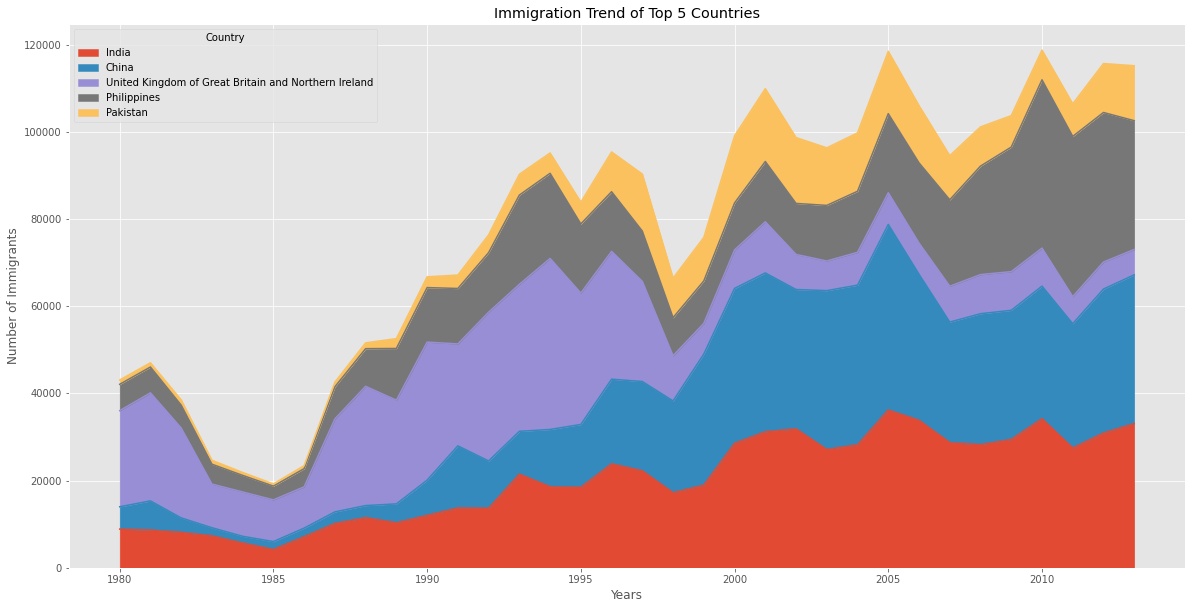

In [32]:
df5.plot(kind='area',
         figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Area plots are stacked by default. For this, each column must be either all positive or all negative values (any `NaN`, i.e. not a number, values will default to 0). 

To produce an unstacked plot, set parameter `stacked` to value `False`.

The unstacked plot has a default transparency (`alpha` parameter value) at 0.5.

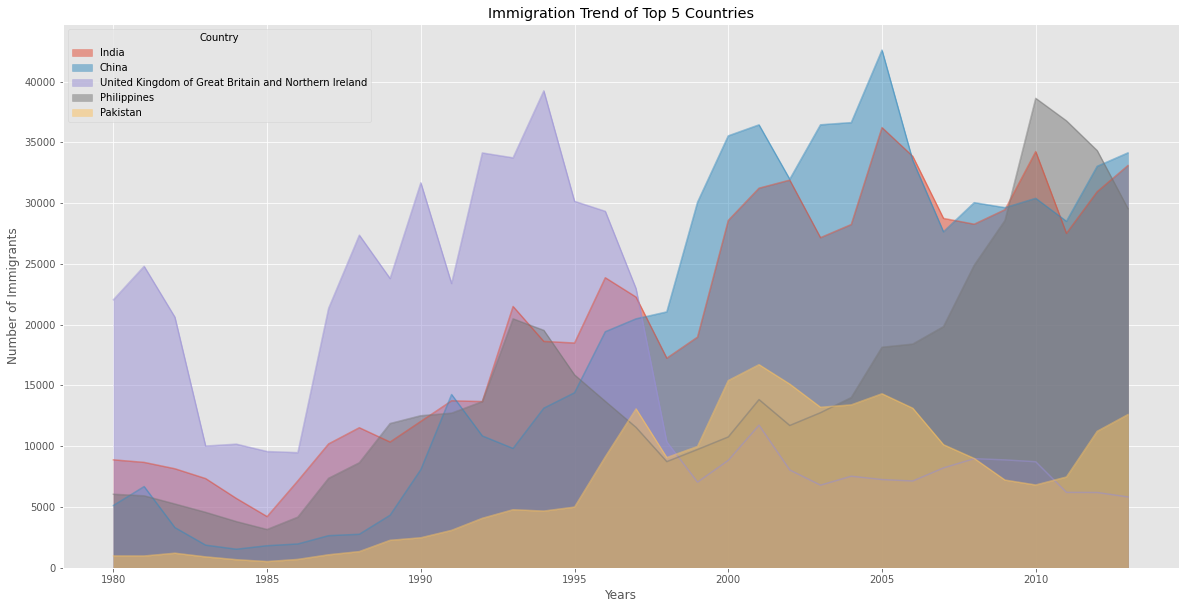

In [33]:
df5.plot(kind='area',
         stacked=False,
         figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

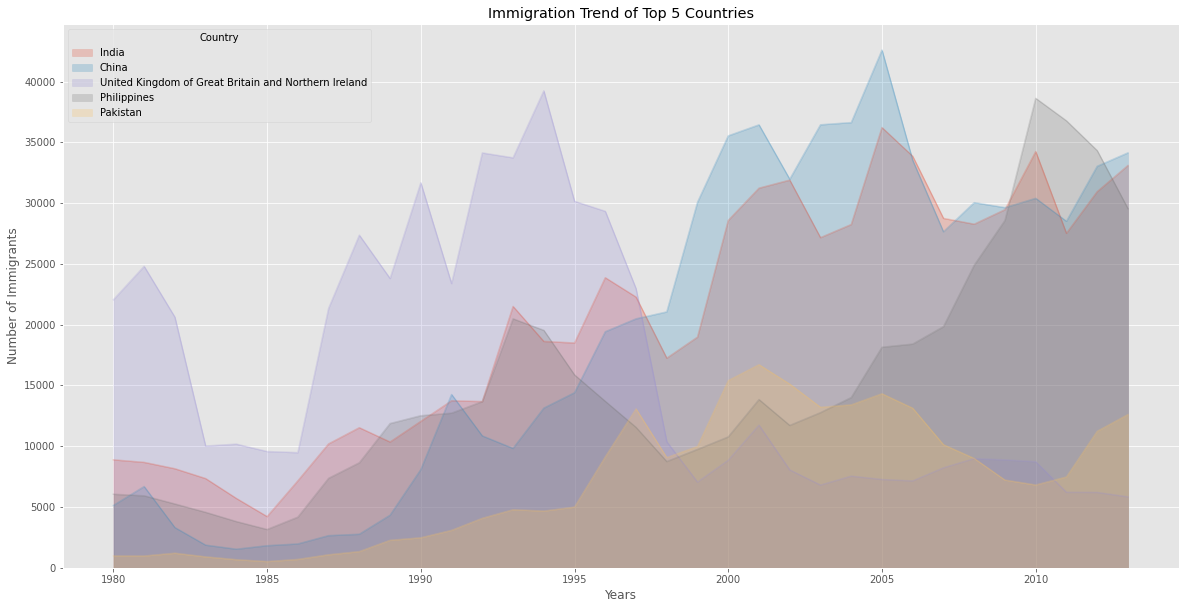

In [34]:
df5.plot(kind='area', 
         alpha=0.25,  # 0 - 1, default value alpha = 0.5
         stacked=False,
         figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Reminder.** Two styles/options of plotting with `matplotlib`:
1. Plotting using the scripting layer
2. Plotting using the artist layer

**1: Scripting layer** 
* procedural method
* use `plt` i.e. `matplotlib.pyplot` 
* add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis, etc.


Text(0.5, 0, 'Years')

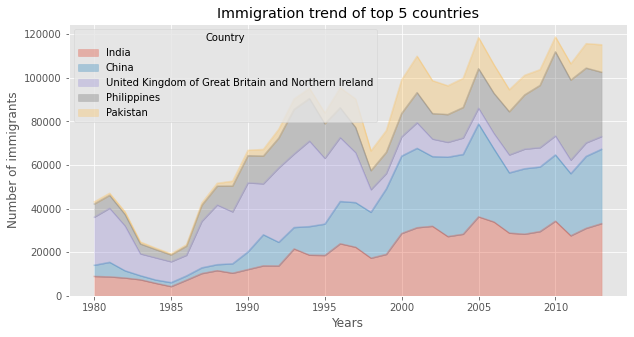

In [35]:
df5.plot(kind='area', alpha=0.35, figsize=(10, 5)) 
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

**2. Artist layer**

* object oriented method
* use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). 
* add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots.

Text(0.5, 0, 'Years')

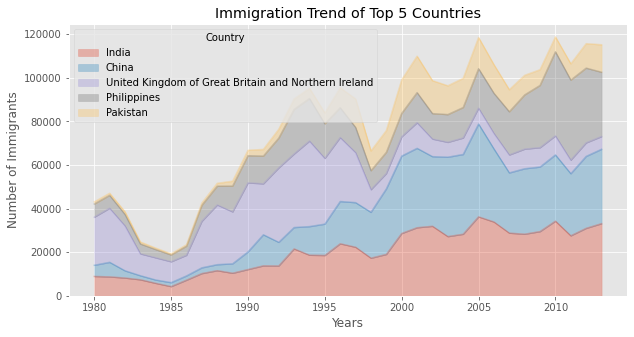

In [36]:
# option 2: preferred option with more flexibility
ax = df5.plot(kind='area', alpha=0.35, figsize=(10, 5))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**<p style="color:red">EXERCISE 3</p>**
1. **Using the scripting layer**, create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

2. **Using the artist layer**, create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.


In [39]:
# Your solution here...



## Histograms

A histogram is a way of representing the *frequency* distribution of numeric dataset. 

How does it work?
* it partitions the x-axis into *bins*
* assigns each data point (in the dataset) to a bin
* counts the number of data points that have been assigned to each bin
* the y-axis is the frequency or the number of data points in each bin

Note: the bin size can be changed and usually we need to do this so that the distribution is displayed nicely.


**A first example**

In [37]:
plt.style.use('fivethirtyeight')

(array([0.02786667, 0.06251667, 0.09441667, 0.11861667, 0.15051667,
        0.1837    , 0.15748333, 0.12063333, 0.09698333, 0.05756667,
        0.0297    ]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        ]),
 <BarContainer object of 11 artists>)

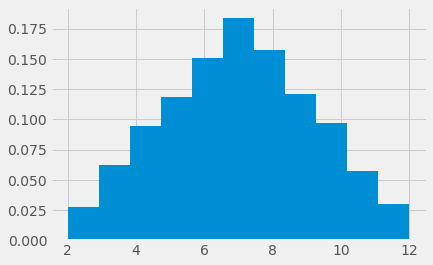

In [40]:
# Roll two 6 sided dies get the sum and plot the histogram
a1 = np.random.randint(1,7,6000)
a2 = np.random.randint(1,7,6000)
a = a1 + a2

# Bins here represent the number of options available 2 to 12 = 11
# Density returns the frequency of each bin
plt.hist(a, bins=11, density=True, stacked=True)


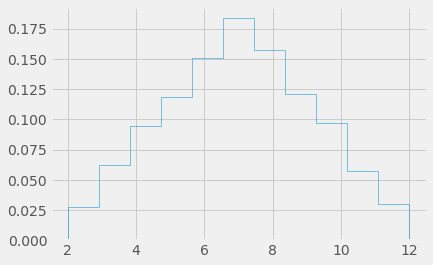

In [41]:
# histtype='step' generates a line plot
plt.hist(a, bins=11, density=True, stacked=True, histtype='step')
plt.show()

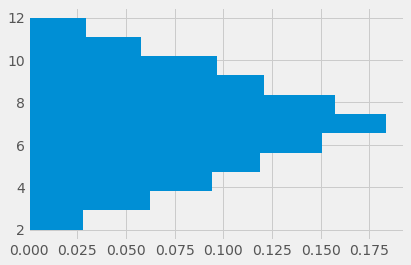

In [42]:
plt.hist(a, bins=11, density=True, stacked=True, orientation='horizontal')
plt.show()

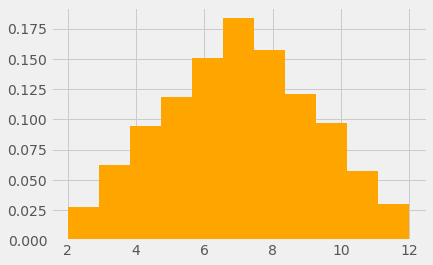

In [43]:
# color='orange' change bar color
plt.hist(a, bins=11, density=True, stacked=True, color='orange')
plt.show()

**Example of histograms for the Canada Immigration Dataset**

What is the frequency distribution of the number of new immigrants from the various countries to Canada in 2013?

In [44]:
# sort the data by country index, as we had it sorted by least number of immigrants
df.sort_index(inplace=True)

In [45]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [46]:
# the 2013 data
df['2013'].head()

Country
Afghanistan       2004
Albania            603
Algeria           4331
American Samoa       0
Andorra              1
Name: 2013, dtype: int64

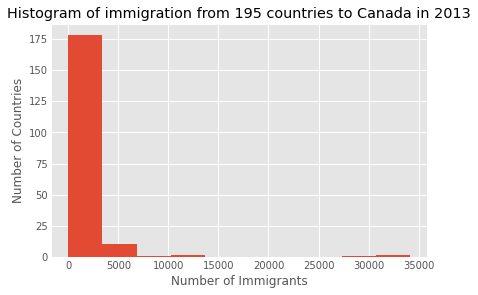

In [48]:
plt.style.use('ggplot')

df['2013'].plot(kind = "hist")

plt.title("Histogram of immigration from 195 countries to Canada in 2013")
plt.xlabel("Number of Immigrants")
plt.ylabel("Number of Countries")

plt.show()

Now, we use **Numpy**'s `histrogram` method to get the bin ranges and frequency counts:

In [49]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. 

For 2013, we have as follows:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants
*   ...

<img src="images/Mod2Fig1-Histogram.jpg" align="center" width=800>


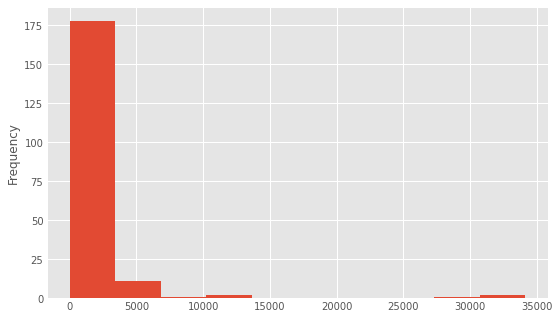

In [50]:
#this distribution is plotted by this line of code:
df['2013'].plot(kind='hist', figsize=(8, 5))
plt.show()

where:
* the x-axis represents the population range of immigrants in intervals of 3412.9
* the y-axis represents the number of countries that contributed to that number of immigrants

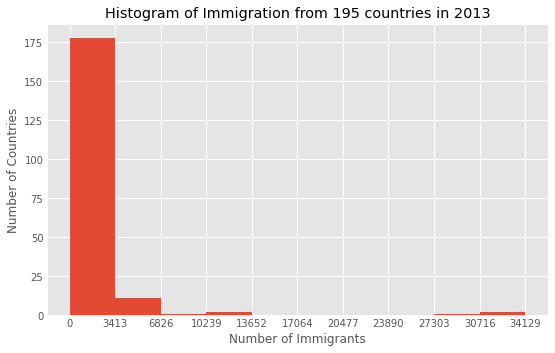

In [51]:
# In the chart above, the x-axis labels do not match with the bin size.
# This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes.

# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Note that `df['2013'].plot.hist()` is the same as above. 
Actually, passing the type of the plot as argument or method behaves the same. This means that `some_data.plot(kind='type_plot', ...)` is equivalent to `some_data.plot.type_plot(...)`. 

See the *pandas* documentation:  [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01).

**What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?**

In [52]:
df.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

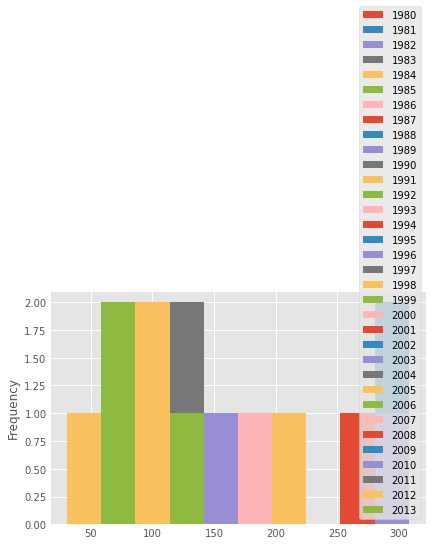

In [53]:
df.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

*Not right!*

Instead of plotting the population frequency distribution of the population for the 3 countries, *pandas* instead plotted the population frequency distribution for the `years`.

This can be easily fixed by first transposing the dataset and then plotting.

In [54]:
df_t = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


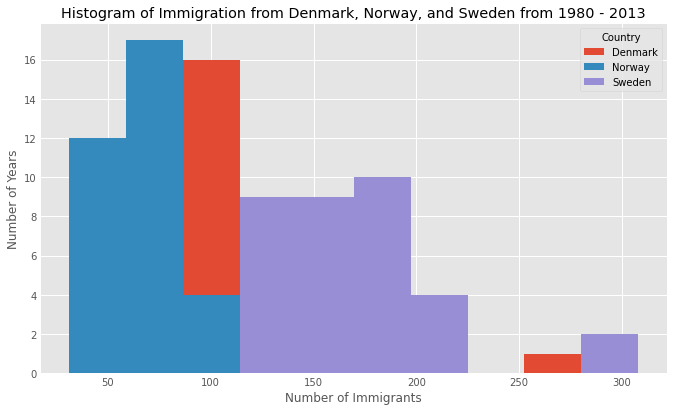

In [55]:
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Modifications to the above chart in order to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.

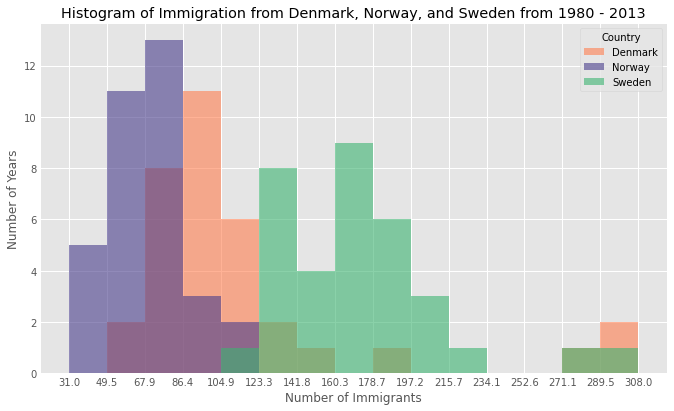

In [56]:
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do not want the plots to overlap each other, we can stack them using the `stacked` parameter. 

The min and max x-axis labels can be adjusteed to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater.

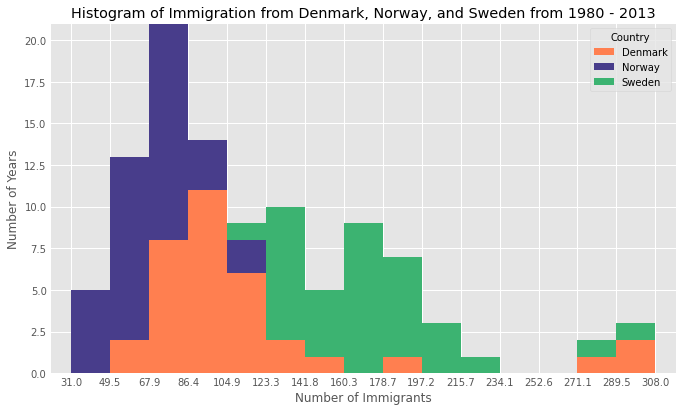

In [57]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

**<p style="color:red">EXERCISE 4</p>**

Create a histogram to display the immigration distribution for Greece, Poland, Romania, and Bulgaria for years 1980 - 2013.

* Use an overlapping plot with 15 bins and a transparency value of 0.35.
* Add a legend, title for the chart, x and y axis.
* Make adjustments to your chart so that aesthetics are improved.

In [58]:
# Your solution here...

